In [1]:
import pandas as pd

# Define dataset
data = pd.DataFrame({
    'age': [25, 34, 45, 23, 31, 40, 26, 37, 30, 42],
    'gender': ['Male', 'Female', 'Female', 'Male', 'Female', 'Male', 'Female', 'Female', 'Male', 'Female'],
    'income': ['Low', 'Medium', 'High', 'Low', 'Medium', 'High', 'Low', 'Medium', 'Medium', 'High'],
    'product': ['No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes']
})

data


,age,gender,income,product
0,25,Male,Low,No
1,34,Female,Medium,Yes
2,45,Female,High,Yes
3,23,Male,Low,No
4,31,Female,Medium,Yes
5,40,Male,High,Yes
6,26,Female,Low,No
7,37,Female,Medium,Yes
8,30,Male,Medium,No
9,42,Female,High,Yes


In [2]:
# Convert target variable
data['product'] = data['product'].map({'No': 0, 'Yes': 1})

# One-hot encode categorical columns (drop first to avoid multicollinearity)
data = pd.get_dummies(data, columns=['gender', 'income'], drop_first=True)

data


,age,product,gender_Male,income_Low,income_Medium
0,25,0,1,1,0
1,34,1,0,0,1
2,45,1,0,0,0
3,23,0,1,1,0
4,31,1,0,0,1
5,40,1,1,0,0
6,26,0,0,1,0
7,37,1,0,0,1
8,30,0,1,0,1
9,42,1,0,0,0


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Features and target
X = data.drop('product', axis=1)
y = data['product']

# Train model
model = LogisticRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)
y_prob = model.predict_proba(X)[:, 1]

# Show predictions
data['predicted'] = y_pred
data['predicted_prob'] = y_prob

data[['product', 'predicted', 'predicted_prob']]


,product,predicted,predicted_prob
0,0,0,0.010198
1,1,1,0.950828
2,1,1,0.999991
3,0,0,0.002135
4,1,1,0.646572
5,1,1,0.999297
6,0,0,0.031873
7,1,1,0.995131
8,0,0,0.364079
9,1,1,0.999900


In [4]:
# Accuracy and confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y, y_pred))
print("\nAccuracy: {:.2f}".format(accuracy_score(y, y_pred)))


Confusion Matrix:
 [[4 0]
 [0 6]]

Accuracy: 1.00


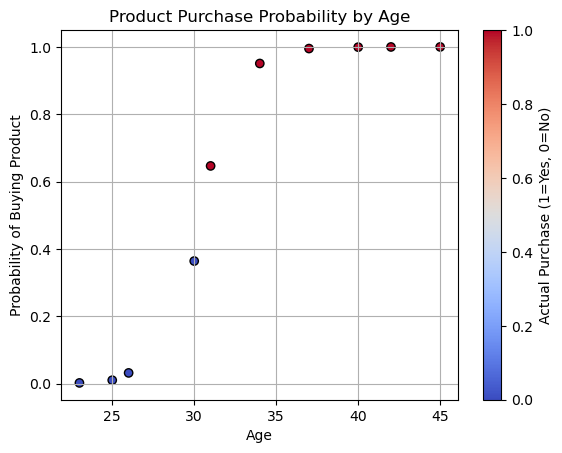

In [5]:
import matplotlib.pyplot as plt

plt.scatter(data['age'], data['predicted_prob'], c=data['product'], cmap='coolwarm', edgecolors='k')
plt.xlabel("Age")
plt.ylabel("Probability of Buying Product")
plt.title("Product Purchase Probability by Age")
plt.colorbar(label='Actual Purchase (1=Yes, 0=No)')
plt.grid(True)
plt.show()
